<img src="https://raw.githubusercontent.com/saulocatharino/assistente_virtual/master/logobeetlabs.png" width=600>
<br><br>

<h1><b>MENTORIA PERSONALIZADA</b></h1><br>


---

<br>
<h4><b>COMPARAÇÕES, MÁSCARAS E SÉRIES</b></h4>


*   Baixando base de dados em CSV
*   Carregando base de dados
*   Filtrando Data Frame com máscaras
*   Criando Dicionários e listas
*   Plotando resultados
*   Filtrando Arrays com expressões, condições e máscaras
*   Criando Series

<br>

---

<br>
<br>






## **BAIXANDO BASE DE DADOS EM CSV**

In [4]:
!wget https://raw.githubusercontent.com/saulocatharino/Imers-oPython/main/codigos_ddd.csv

--2022-06-10 16:02:05--  https://raw.githubusercontent.com/saulocatharino/Imers-oPython/main/codigos_ddd.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177636 (173K) [text/plain]
Saving to: ‘codigos_ddd.csv’

codigos_ddd.csv     100%[===================>] 173.47K  --.-KB/s    in 0.01s   

2022-06-10 16:02:06 (17.3 MB/s) - ‘codigos_ddd.csv’ saved [177636/177636]



## **CARREGANDO BASE DE DADOS**

In [ ]:
# Importa bibliotecas para manipulação de Data Frames 
import pandas as pd

# Função para leitura de arquivo CSV parametrizando o separador com vírgula
df = pd.read_csv("codigos_ddd.csv", sep=",", low_memory=False)
#df.to_excel("codigos_ddd.xlsx", encoding = "ISO-8859-1")

# Demonstra todas as chaves do Data Frame
print(df)

      Unnamed: 0  Código IBGE  UF               MUNICiPIO  CoDIGO_NACIONAL
0              0      2919553  BA  LUIS EDUARDO MAGALHAES               77
1              1      3530805  SP              MOGI-MIRIM               19
2              2      5222302  GO           VILA PROPICIO               62
3              3      5208152  GO      GAMELEIRA DE GOIAS               62
4              4      5210158  GO       IPIRANGA DE GOIAS               62
...          ...          ...  ..                     ...              ...
5560        5560      1100056  RO              CEREJEIRAS               69
5561        5561      1100049  RO                  CACOAL               69
5562        5562      1100031  RO                  CABIXI               69
5563        5563      1100023  RO               ARIQUEMES               69
5564        5564      1100015  RO   ALTA FLORESTA D'OESTE               69

[5565 rows x 5 columns]


## **FILTRANDO DATA FRAME COM MÁSCARAS**

In [ ]:
# Adquire valores únicos da coluna 'UF'
estados = df['UF'].unique()

qtd_estados = len(estados)

print(estados)
print("Quantidade de estados: {}".format(qtd_estados))

['BA' 'SP' 'GO' 'MT' 'MS' 'RS' 'SC' 'PR' 'RJ' 'ES' 'MG' 'AL' 'PE' 'PB'
 'RN' 'CE' 'PI' 'MA' 'TO' 'PA' 'RO' 'DF' 'SE' 'AP' 'RR' 'AM' 'AC']
Quantidade de estados: 27


In [ ]:
# Adquire valores únicos da coluna 'MUNICiPIO'

municipios = df['MUNICiPIO'].unique()
qtd_municipios = len(municipios)

print(municipios)
print("Quantidade de municípios: {}".format(qtd_municipios))

['LUIS EDUARDO MAGALHAES' 'MOGI-MIRIM' 'VILA PROPICIO' ... 'CABIXI'
 'ARIQUEMES' "ALTA FLORESTA D'OESTE"]
Quantidade de municípios: 5293


In [ ]:
# Adquire valores únicos da coluna 'CoDIGO_NACIONAL'

codigos = df['CoDIGO_NACIONAL'].unique()
qtd_codigos = len(codigos)

print(codigos)
print("Quantidade de códigos: {}".format(qtd_codigos))

[77 19 62 64 66 65 67 55 51 54 49 47 44 18 14 11 16 22 24 28 38 35 31 37
 33 32 82 87 81 83 84 85 86 89 98 63 91 53 69 61 48 42 46 41 45 43 17 15
 12 13 21 27 34 74 73 75 71 79 88 99 96 94 93 95 92 97 68]
Quantidade de códigos: 67


## **CRIANDO DICIONÁRIOS E LISTAS COM DATA FRAMES FILTRADOS**

In [ ]:
municipios_por_uf = {}
lista_ddd_por_uf = {}
lista_qtd_ddd_por_uf = []
lista_qtd_municipios_por_uf = []

# Looping retornando cada valor da lista 'estados'
for estado in estados:

  # Condição de Comparação para aquisição dos municípios do UF atual excluindo duplicados
  municipios = df.where(df['UF'] == estado)['MUNICiPIO'].dropna().unique()

  # Adiciona ao dicionário a quantidade de municípios e a lista de municipios para cada UF
  municipios_por_uf[estado] = {'quantidade_de_municipios':len(municipios),'lista_de_municipios':municipios.tolist()}


  # Condição de Comparação para aquisição dos códigos de DDD em cada UF, excluindo as 'nan' e duplicadas.
  lista_ddd = df.where(df['UF'] == estado)['CoDIGO_NACIONAL'].dropna().unique()

  # Adiciona ao dicionário a lista de DDD da UF
  lista_ddd_por_uf[estado] = lista_ddd

  # Calcula quantidade de DDD na UF
  qtd_ddd = len(lista_ddd)
  lista_qtd_municipios_por_uf.append(len(municipios))
  municipios_por_uf[estado] = {'quantidade_de_municipios':len(municipios),'lista_de_municipios':municipios.tolist(),'quantidade_de_codigos':qtd_ddd}

  # Adiciona quantidade de DDD à lista
  lista_qtd_ddd_por_uf.append(qtd_ddd)





## **PLOTANDO RESULTADOS**

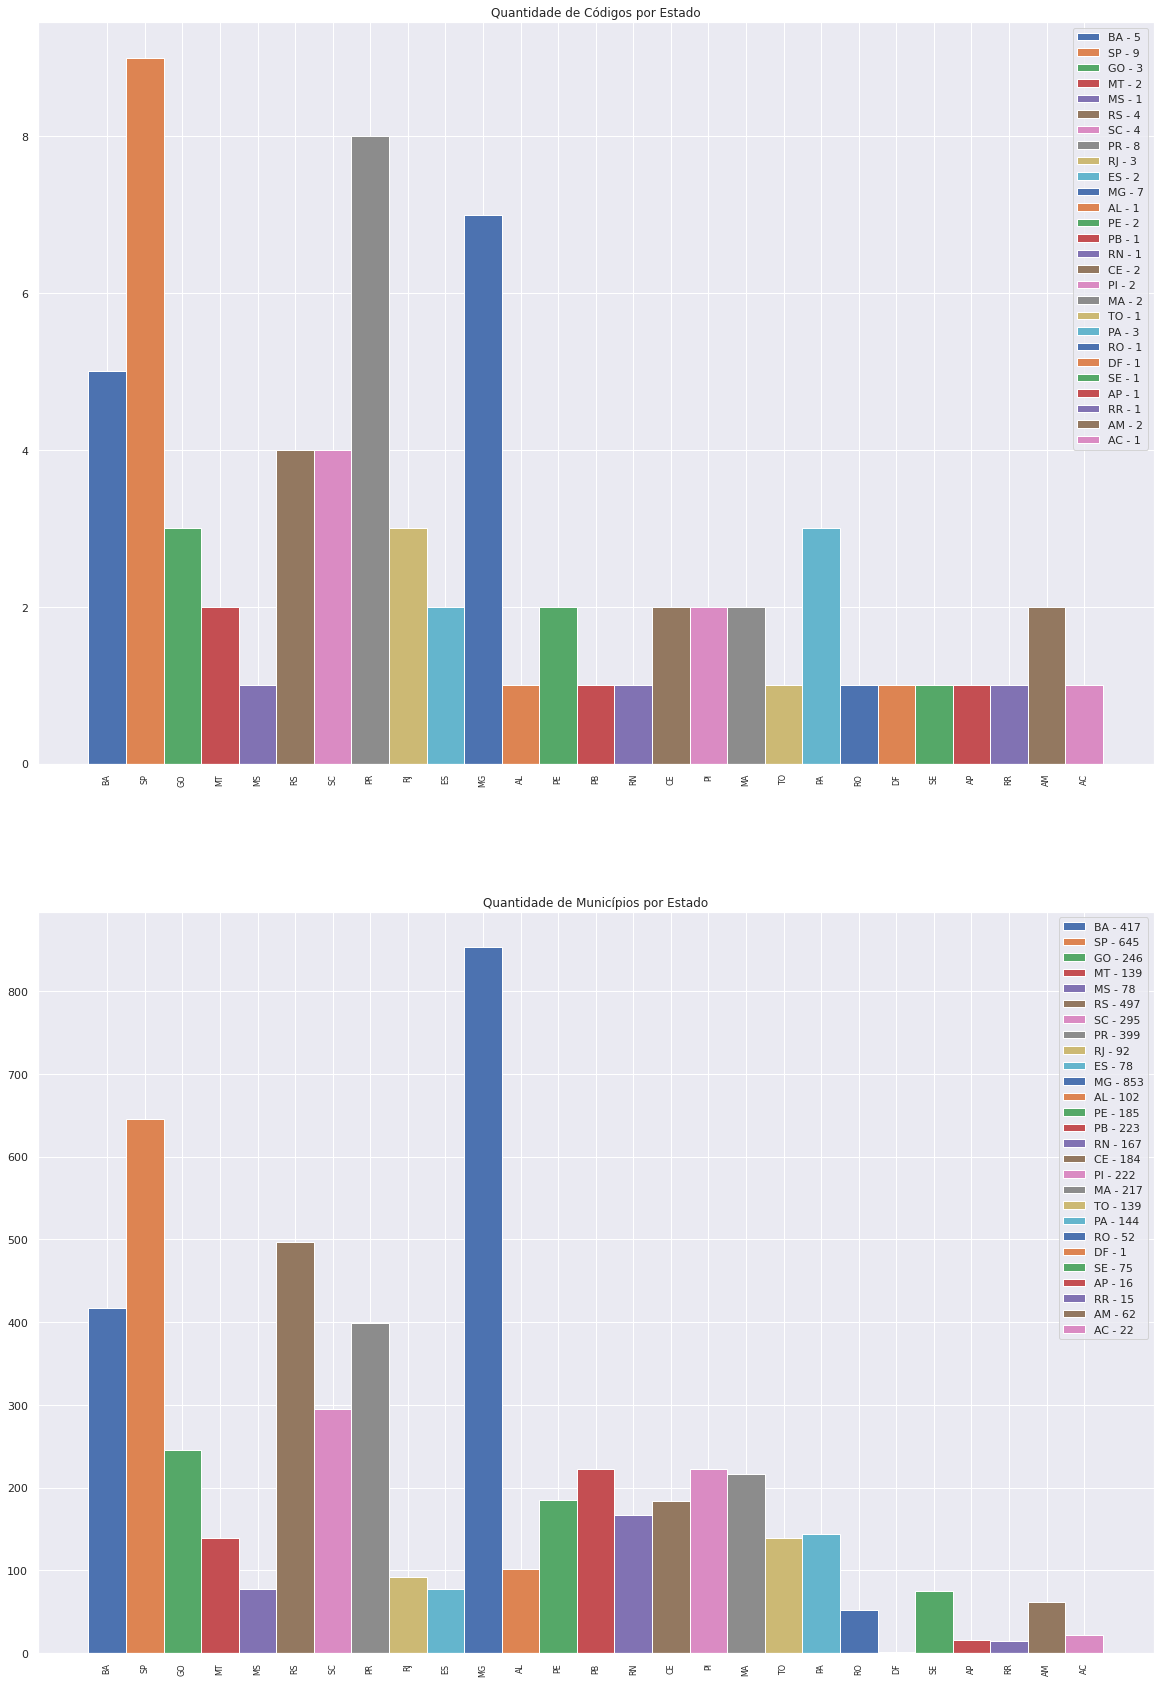

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set() 

fig, ax = plt.subplots(2, figsize=(20,30))

ax[1].set_title("Quantidade de Municípios por Estado")
ax[0].set_title("Quantidade de Códigos por Estado")

count = 0


for estado in estados:
  qtd = municipios_por_uf[estado]['quantidade_de_municipios']
  label = estado + ' - ' + str(len(lista_ddd_por_uf[estado]))
  label2 = estado + ' - ' + str(qtd)

  x = count
  y = len(lista_ddd_por_uf[estado])
  y2 = qtd
  ax[0].bar(x, y, 1, label=label)
  ax[1].bar(x, y2, 1, label=label2)

  count +=1

ax[0].legend() 
ax[1].legend() 

ax[0].set_xticklabels(estados, rotation=90, fontsize=8)
ax[1].set_xticklabels(estados, rotation=90, fontsize=8)

index_list = np.arange(0,len(estados))

ax[0].set_xticks(index_list)
ax[1].set_xticks(index_list)

plt.savefig("qtd_por_estados.png")
plt.show()



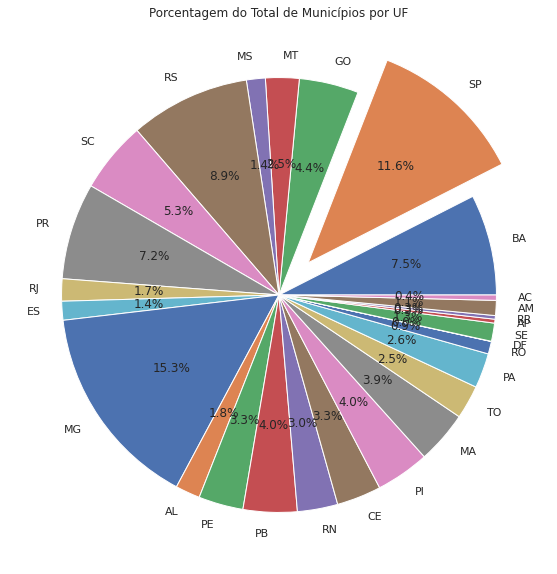

In [ ]:
qtds = []
explodir = []

destaque = ['SP']


for estado in estados:
  qtd = municipios_por_uf[estado]['quantidade_de_municipios']
  qtds.append(qtd)
  if estado in destaque:
    explodir.append(0.2)
  else:
    explodir.append(0.0)

fig, ax = plt.subplots(1, figsize=(10,10))

ax.set_title("Porcentagem do Total de Municípios por UF")

ax.pie(qtds, labels=estados, explode = explodir, autopct='%1.1f%%',  startangle=0)
plt.show()

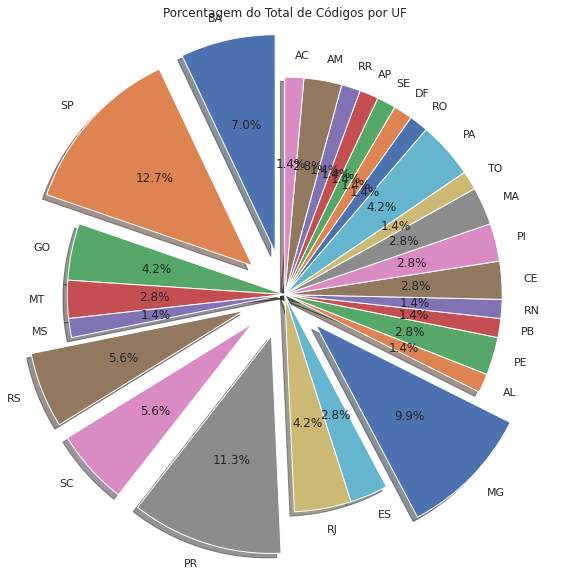

In [ ]:
qtds = []
explode = []

destaque = ['SP','MG','BA','RS','PR','SC']

for estado in estados:
  qtd = municipios_por_uf[estado]['quantidade_de_codigos']
  qtds.append(qtd)
  if estado in destaque:
    explode.append(0.2)
  else:
    explode.append(0.0)

fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_title("Porcentagem do Total de Códigos por UF")
ax.pie(qtds,  labels=estados, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

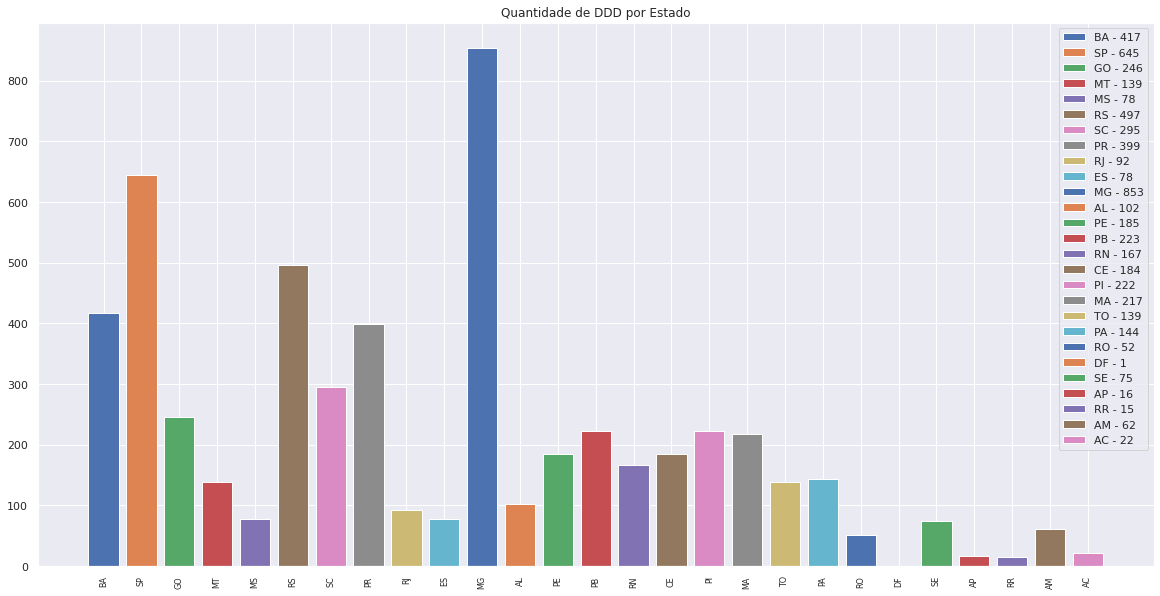

In [ ]:
fig,ax = plt.subplots(1,figsize=(20,10))

ax.set_title("Quantidade de DDD por Estado")
count = 0

for estado in estados:
  qtd = municipios_por_uf[estado]['quantidade_de_municipios']
  label = estado + ' - ' + str(qtd)
  ax.bar(count, qtd, label=label)
  count += 1

ax.legend() 
ax.set_xticklabels(estados, rotation=90, fontsize=8)

index_list = np.arange(0,len(estados))
ax.set_xticks(index_list)
plt.show()



## **FILTRANDO ARRAYS COM EXPRESSÕES, CONDIÇÕES E MÁSCARAS**


In [ ]:
# Cria lista vazia
x_list = []

for UF in estados:
  qtd = municipios_por_uf[UF]['quantidade_de_municipios']
  # Adiciona quantidade de municípios de cada UF à lista
  x_list.append(qtd)

# Converte Lista em Array
x = np.array(x_list)


In [ ]:
x_list > 6

TypeError: ignored

In [ ]:
# Cria máscara com a regra aplicada a valores maiores que 5
filtradas = x > 8
#filtradas = np.greater(x,5)

#print(filtradas)

print(estados[filtradas])

# Também poderia ser obtido da seguinte maneira
#print(estados[x>5])

['BA' 'SP' 'GO' 'MT' 'MS' 'RS' 'SC' 'PR' 'RJ' 'ES' 'MG' 'AL' 'PE' 'PB'
 'RN' 'CE' 'PI' 'MA' 'TO' 'PA' 'RO' 'SE' 'AP' 'RR' 'AM' 'AC']


In [ ]:
# maior ou igual a 3
filtradas = x >= 3  

#filtradas = np.greater_equal(x,3)

print(estados[filtradas])

['BA' 'SP' 'GO' 'MT' 'MS' 'RS' 'SC' 'PR' 'RJ' 'ES' 'MG' 'AL' 'PE' 'PB'
 'RN' 'CE' 'PI' 'MA' 'TO' 'PA' 'RO' 'SE' 'AP' 'RR' 'AM' 'AC']


In [ ]:
# Diferente (não igual) a 3
filtradas = x != 3  
#filtradas = np.not_equal(x,3)

print(estados[filtradas])

['BA' 'SP' 'GO' 'MT' 'MS' 'RS' 'SC' 'PR' 'RJ' 'ES' 'MG' 'AL' 'PE' 'PB'
 'RN' 'CE' 'PI' 'MA' 'TO' 'PA' 'RO' 'DF' 'SE' 'AP' 'RR' 'AM' 'AC']


In [ ]:
# Igual a 3
filtradas = x == 3  
#filtradas = np.equal(x,3)

print(estados[filtradas])

[]


In [ ]:
# Também é possível incluir expressões às comparações

(2 * x) == (x ** 2) 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [ ]:
filtradas = (2 * x) == (x ** 2) 
print(estados[filtradas])

[]


In [ ]:
# Condição dupla para selecionar valores maiores que 50 e menores que 100
(x > 50) & (x < 160)

array([False, False, False,  True,  True, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
        True,  True,  True, False,  True, False, False,  True, False])

In [ ]:
filtradas = (x > 50) & (x < 100)

print(estados[filtradas])

['MS' 'RJ' 'ES' 'RO' 'SE' 'AM']


In [ ]:
# Condição para selecionar valores iguais a 1 ou valores iguais a 22
filtradas = (x == 1) | (x == 22) 

print(estados[filtradas])

['DF' 'AC']


## **PANDAS SERIES & DATA FRAMES**

In [ ]:
# Converte Dict para Series 
series = pd.Series(municipios_por_uf)
dataframe = series = pd.DataFrame(municipios_por_uf)

series

,BA,SP,GO,MT,MS,RS,SC,PR,RJ,ES,MG,AL,PE,PB,RN,CE,PI,MA,TO,PA,RO,DF,SE,AP,RR,AM,AC
quantidade_de_municipios,417,645,246,139,78,497,295,399,92,78,853,102,185,223,167,184,222,217,139,144,52,1,75,16,15,62,22
lista_de_municipios,"[LUIS EDUARDO MAGALHAES, LIVRAMENTO DO BRUMADO...","[MOGI-MIRIM, SANTO ANTÔNIO DO ARACANGUA, MOGI-...","[VILA PROPICIO, GAMELEIRA DE GOIAS, IPIRANGA D...","[SANTO ANTONIO DO LESTE, RONDOLANDIA, NOVO SAN...","[PARAISO DAS ÁGUAS, BATAIPORÃ, AMAMBAÍ, VICENT...","[SAO PEDRO DAS MISSÕES, SAO JOSE DO SUL, SANTA...","[SÃO MIGUEL D'OESTE, PRESIDENTE CASTELO BRANCO...","[VILA ALTA, XAMBRÊ, VITORINO, VIRMOND, DOUTOR ...","[TRAJANO DE MORAIS, PARATI, ARMAÇÃO DE BÚZIOS,...","[MARATAIZES, VITÓRIA, VILA VELHA, VILA VALÉRIO...","[VARJÃO, TOCOS DO MOGI, SAO THOME DAS LETRAS, ...","[JEQUIA DA PRAIA, VIÇOSA, UNIÃO DOS PALMARES, ...","[QUIXABÁ, JATOBA, ITAMARACÁ, XEXÉU, VITÓRIA DE...","[SERIDO, SÃO DOMINGOS DE POMBAL, SANTARÉM, SAN...","[VILA FLÔR, SÃO MIGUEL DE TOUROS, SÃO JOSÉ DE ...","[ITAPAGÉ, ACARAPÉ, VIÇOSA DO CEARÁ, VÁRZEA ALE...","[PAU DARCO DO PIAUÍ, MASSÂPE DO PIAUÍ, CAPITÃO...","[PINDARÉ MIRIM, ZÉ DOCA, VITORINO FREIRE, VITÓ...","[SÃO VALÉRIO DA NATIVIDADE, COUTO DE MAGALHÃES...","[SANTA ISABEL DO PARÁ, XINGUARA, VITÓRIA DO XI...","[ALTO ALEGRE DO PARECIS, VALE DO PARAÍSO, VALE...",[BRASÍLIA],"[UMBAÚBA, TOMAR DO GERU, TOBIAS BARRETO, TELHA...","[VITÓRIA DO JARI, TARTARUGALZINHO, SANTANA, PR...","[UIRAMUTÃ, SÃO LUIZ, SÃO JOÃO DA BALIZA, RORAI...","[URUCURITUBA, URUCARÁ, UARINI, TONANTINS, TEFÉ...","[PORTO ACRE, XAPURI, TARAUACÁ, SENA MADUREIRA,..."
quantidade_de_codigos,5,9,3,2,1,4,4,8,3,2,7,1,2,1,1,2,2,2,1,3,1,1,1,1,1,2,1


In [ ]:
series.index

Index(['quantidade_de_municipios', 'lista_de_municipios',
       'quantidade_de_codigos'],
      dtype='object')

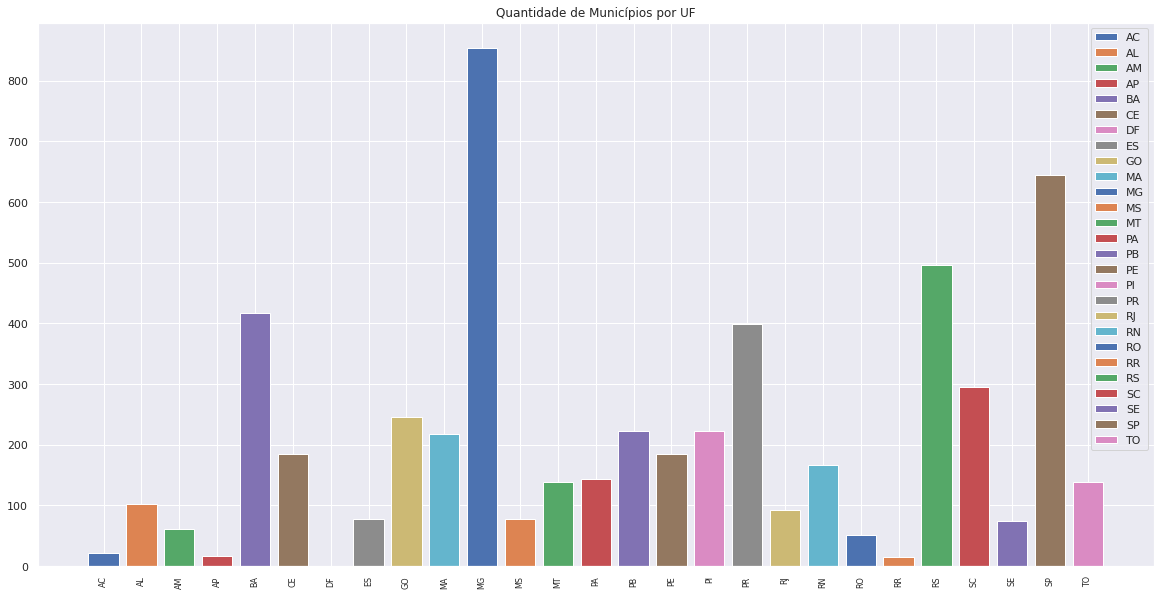

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.set_title("Quantidade de Municípios por UF")
count = 0
for serie in sorted(series.index):
  ax.bar(count, series[serie]['quantidade_de_municipios'], label=serie)
  count+=1
ax.legend() 
ax.set_xticklabels(sorted(series.index), rotation=90, fontsize=8)

index_list = np.arange(0,len(series.index))
ax.set_xticks(index_list)
plt.show()

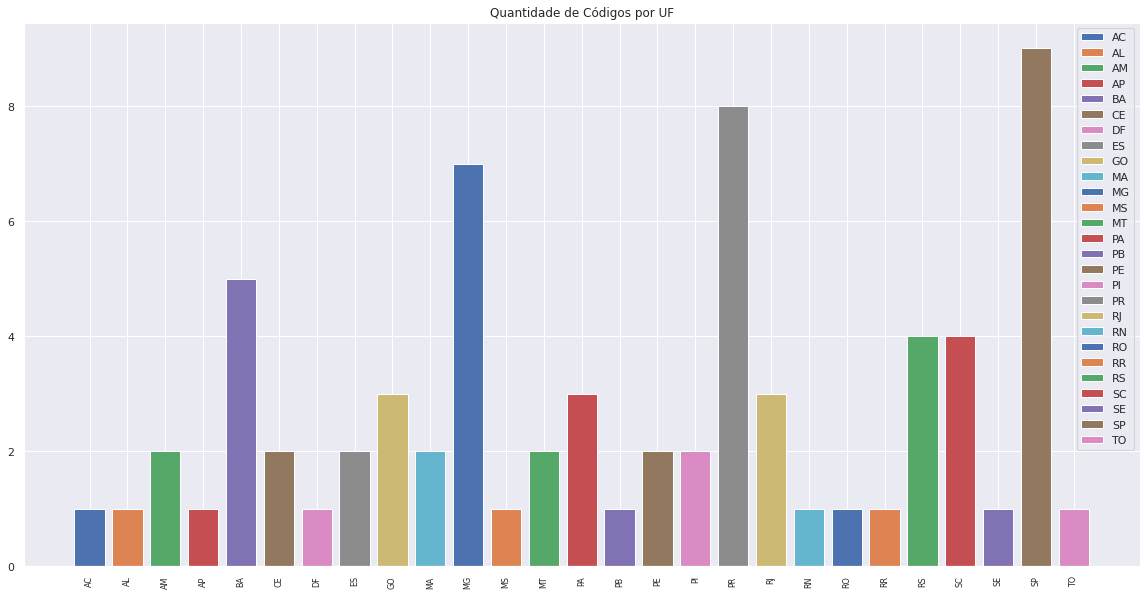

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.set_title("Quantidade de Códigos por UF")
count = 0
for serie in sorted(series.index):
  ax.bar(count, series[serie]['quantidade_de_codigos'], label=serie)
  count+=1
ax.legend() 
ax.set_xticklabels(sorted(estados), rotation=90, fontsize=8)

index_list = np.arange(0,len(estados))
ax.set_xticks(index_list)
plt.show()